### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [2]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
cali = pd.read_csv('data/housing.csv')

In [5]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Calculate the median of the 'total_bedrooms' column
median_total_bedrooms = cali['total_bedrooms'].median()

# Fill null values in 'total_bedrooms' column with the median
cali['total_bedrooms'] = cali['total_bedrooms'].fillna(median_total_bedrooms)

### Train/Test split

In [11]:
# create X, y
X = cali.drop('median_house_value', axis=1)

In [12]:
y = cali.median_house_value

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

### Baseline Predictions

In [16]:
# Calculate baseline mses
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()

mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train: .2f}')
print(f'Baseline for testing data: {mse_baseline_test: .2f}')

(16512,) (4128,)
Baseline for training data:  13367782117.89
Baseline for testing data:  13104089782.41


### Examining the Correlations

In [18]:
# Examine the correlations
highest_corr = ''
numeric_df = cali.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
highest_corr = corr_matrix['median_house_value'].nlargest(2).index[1]
print(highest_corr)
corr_matrix

median_income


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


### VIF - measure the multicollinearity in the independent features

In [20]:
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog] #First column is excluded from this list which becomes y in next step
    X, y = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X,y).score(X,y) 
    #.score(X, y) computes the 𝑅 square value for the fitted model, which measures the proportion of variance in y explained by X.

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [21]:
# Select numberic columns and drop Lattitude and Lattitude as they will be transformed using kmeans later
X_num = X.select_dtypes(include=[np.number]).drop(['latitude', 'longitude'], axis=1)
X_num.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [22]:
vif(X_num.columns, X_num).sort_values(by = 'VIF', ascending = False)

,VIF
households,27.187453
total_bedrooms,26.572410
total_rooms,11.320621
population,6.122624
median_income,1.468233
housing_median_age,1.161283


In [23]:
# Drop households column and calculate VIF again
X_num = X_num.drop('households', axis=1)
X_num.head()

,housing_median_age,total_rooms,total_bedrooms,population,median_income
0,41.0,880.0,129.0,322.0,8.3252
1,21.0,7099.0,1106.0,2401.0,8.3014
2,52.0,1467.0,190.0,496.0,7.2574
3,52.0,1274.0,235.0,558.0,5.6431
4,52.0,1627.0,280.0,565.0,3.8462


In [24]:
vif(X_num.columns, X_num).sort_values(by = 'VIF', ascending = False)

,VIF
total_rooms,11.317147
total_bedrooms,10.694857
population,4.623594
median_income,1.459948
housing_median_age,1.153784


In [25]:
# Drop total_rooms and calculate VIF again
X_num = X_num.drop('total_rooms', axis=1)
X_num.head()

,housing_median_age,total_bedrooms,population,median_income
0,41.0,129.0,322.0,8.3252
1,21.0,1106.0,2401.0,8.3014
2,52.0,190.0,496.0,7.2574
3,52.0,235.0,558.0,5.6431
4,52.0,280.0,565.0,3.8462


In [26]:
vif(X_num.columns, X_num).sort_values(by = 'VIF', ascending = False)

,VIF
total_bedrooms,4.299824
population,4.228169
housing_median_age,1.133319
median_income,1.017122


### Preprocessor

  - Impute missing values and standardize the numerical columns (longitude, latitude, housing_median_age, total_bedrooms, population, median_income). SimpleImputer(strategy='median')
  - Impute missing values for categorical columns (ocean_proximity). SimpleImputer(strategy='most_frequent')
  - Apply one-hot encoding to ocean_proximity.
 - Apply KMeans clustering to longitude and latitude and reshape the cluster labels.
 - Pass through any remaining columns (remainder='passthrough').

In [28]:
# Define the preprocessing steps
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'median_income']
categorical_features = ['ocean_proximity']

In [29]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [30]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
# Define the polynomial transformer for numerical features
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', poly_transformer, numeric_features), 
        ('kmeans', KMeans(n_clusters=10), ['longitude', 'latitude'])
    ],
    remainder='passthrough'
)

### Pipeline

    - Combines the preprocessor with a LinearRegression model.
    - Fits the pipeline to the training data (pipeline.fit(X_train, y_train)).
    - Uses the pipeline to make predictions on both the training data and new data with missing values (pipeline.predict(new_data)).

In [35]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [36]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('kmeans',
                                                  KMeans(n_clusters=10),
                                                  ['longitude', 'latitude'])])),
                ('regressor', LinearRegression())])

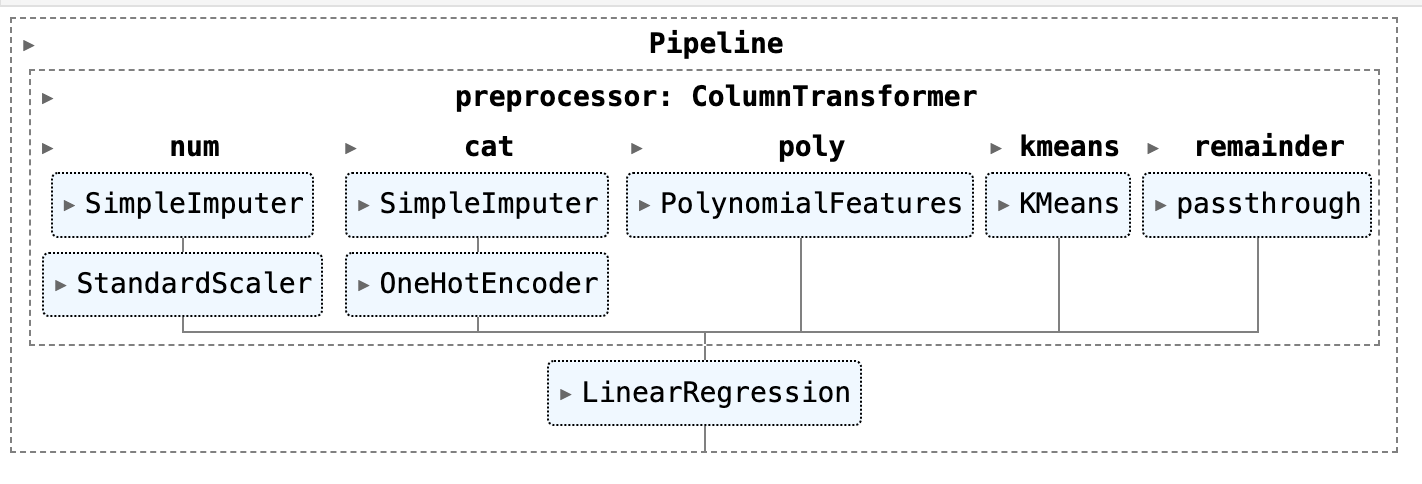

In [37]:
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  3848525885.10
Test MSE:  4242588621.76


### Optimal Model Complexity

In [40]:
train_mses = []
test_mses = []

for i in range(1, 6):
    # poly_transformer
    poly_transformer = PolynomialFeatures(degree=i, include_bias=False)
    # preprocessor
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', poly_transformer, numeric_features), 
        ('kmeans', KMeans(n_clusters=10), ['longitude', 'latitude'])
    ],
    remainder='passthrough'
    )
    # pipeline
    pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ])
    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)
    # Predict
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    # mses
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

print(train_mses)
print(test_mses)
pipe

[4453812741.062832, 3833236690.6234007, 3300597742.2968235, 3562490752.9496384, 3425914048.218323]
[4588073323.204361, 4236685118.847941, 3913891340.083299, 5366277253.303058, 27042829646.13205]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('kmeans',
                                                  KMeans(n_clusters=10),
                                                  ['longitude', 'latitude'])])),
                ('regressor', LinearRegression())])

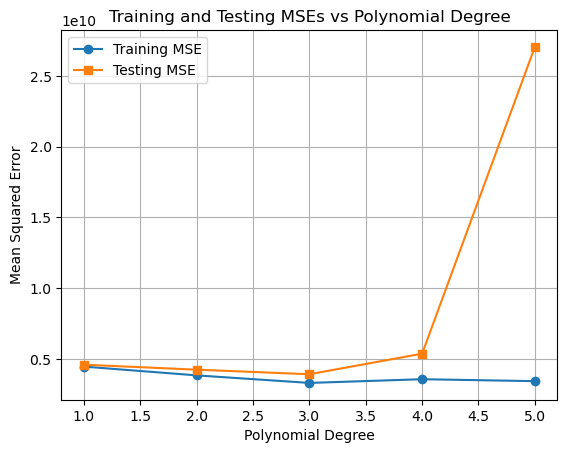

In [41]:
# Plotting MSES
degrees = range(1, 6)
plt.plot(degrees, train_mses, marker='o', label='Training MSE')
plt.plot(degrees, test_mses, marker='s', label='Testing MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing MSEs vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)

In [43]:
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  3913891340.08


### Permutation Importance

In [45]:
from sklearn.inspection import permutation_importance

In [46]:
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', poly_transformer, numeric_features), 
        ('kmeans', KMeans(n_clusters=10), ['longitude', 'latitude'])
    ],
    remainder='passthrough'
)

In [48]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [49]:
# Fit the pipeline to the training data
lr_model = pipeline.fit(X_train, y_train)

In [50]:
y_pred = lr_model.predict(X_test)

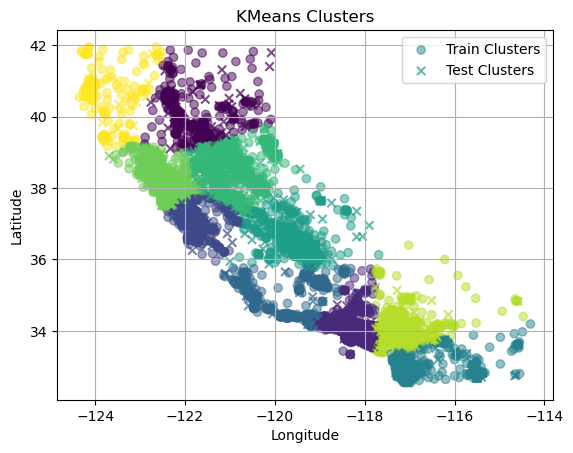

In [51]:
# Extract the KMeans step and fit it separately for visualization
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train[['longitude', 'latitude']])

# Predict cluster assignments
train_clusters = kmeans.predict(X_train[['longitude', 'latitude']])
test_clusters = kmeans.predict(X_test[['longitude', 'latitude']])

# Plotting clusters
plt.scatter(X_train['longitude'], X_train['latitude'], c=train_clusters, cmap='viridis', marker='o', alpha=0.5, label='Train Clusters')
plt.scatter(X_test['longitude'], X_test['latitude'], c=test_clusters, cmap='viridis', marker='x', alpha=0.7, label='Test Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clusters')
plt.legend()
plt.grid(True)
plt.show()

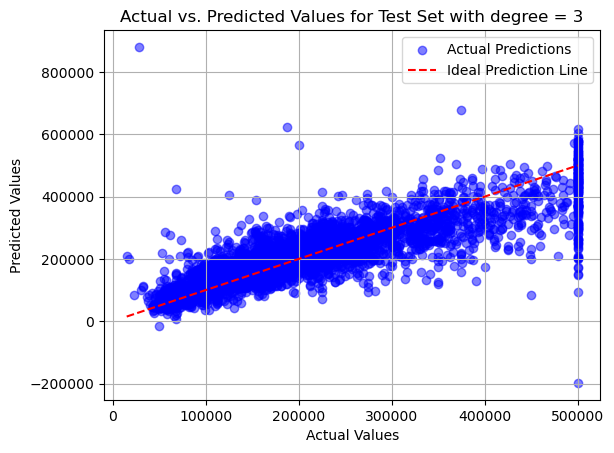

In [52]:
# Plotting predictions vs actual values with degree = 3
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual Predictions', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Test Set with degree = 3')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
r = permutation_importance(lr_model, X_test, y_test, random_state = 42)
r.importances_mean

array([3.53737449e+00, 4.12989186e+00, 8.82013026e-02, 1.23559253e-04,
       9.45949497e-01, 1.05384086e+00, 6.63479806e-02, 7.32477865e-01,
       3.32377822e-03])

In [54]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [55]:
importance_df = pd.DataFrame(zip(X_test.columns, r.importances_mean), columns=['Feature', 'Importance'])

In [56]:
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)
sorted_importance_df

,Feature,Importance
1,latitude,4.129892
0,longitude,3.537374
5,population,1.053841
4,total_bedrooms,0.945949
7,median_income,0.732478
2,housing_median_age,0.088201
6,households,0.066348
8,ocean_proximity,0.003324
3,total_rooms,0.000124


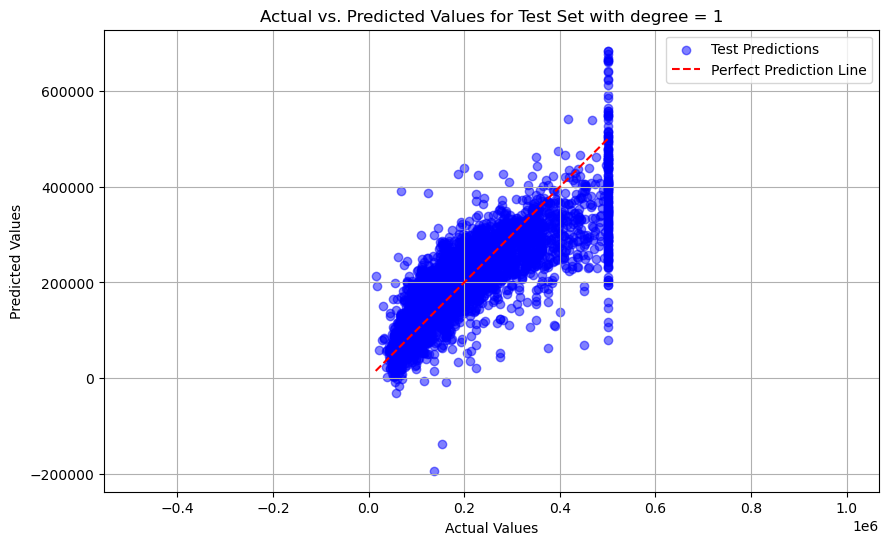

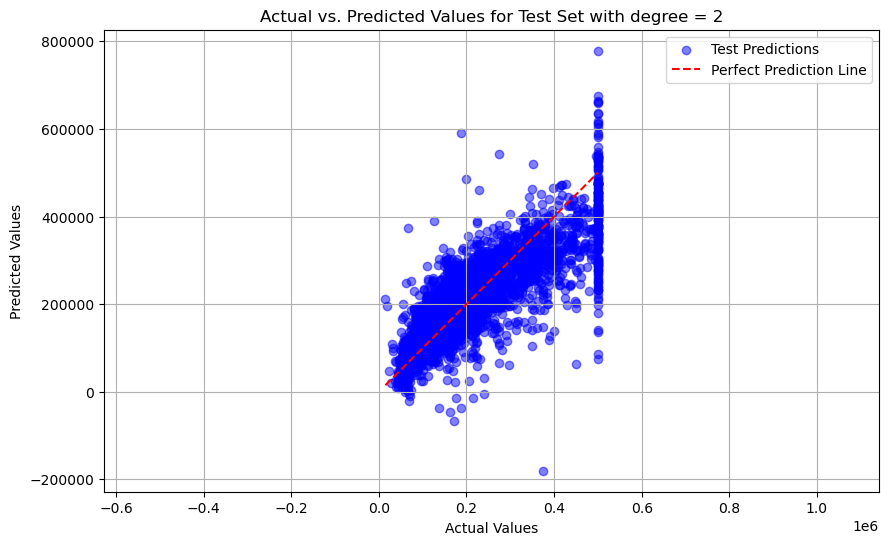

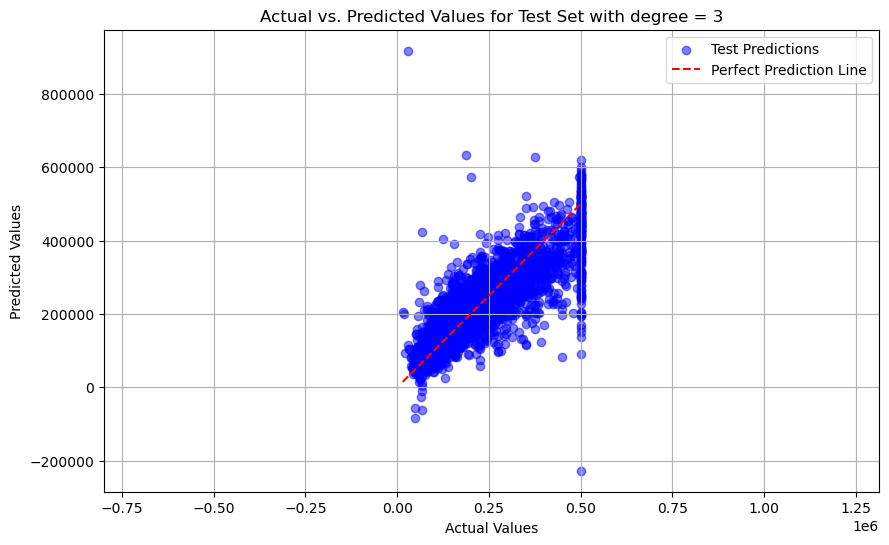

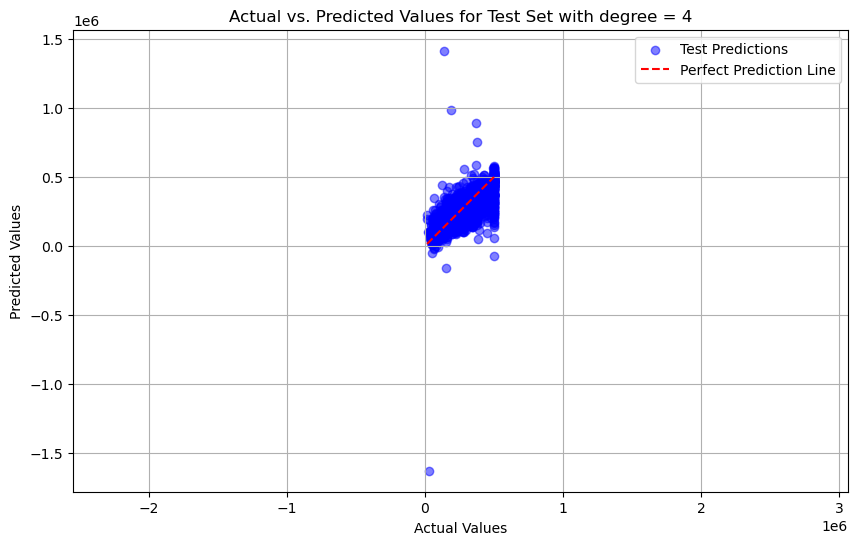

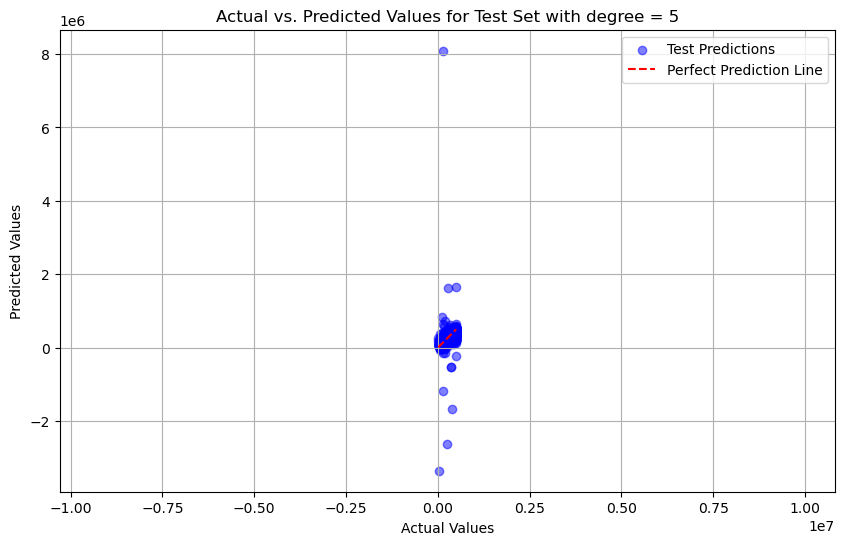

[4452126310.942979, 3823338839.6427345, 3354497191.786511, 3410690603.5101495, 3425932257.8879967]
[4585548896.780803, 4219484668.4426875, 3983271808.760483, 5176783716.777924, 27042798767.450783]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_bedrooms',
                                                   'population',
                                                   'median_income']),
                                                 ('kmeans',
                                                  KMeans(n_clusters=10),
                                                  ['longitude', 'latitude'])])),
                ('regressor', LinearRegression())])

In [113]:
train_mses1 = []
test_mses1 = []

for i in range(1, 6):
    # poly_transformer
    poly_transformer = PolynomialFeatures(degree=i, include_bias=False)
    # preprocessor
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', poly_transformer, numeric_features), 
        ('kmeans', KMeans(n_clusters=10), ['longitude', 'latitude'])
    ],
    remainder='passthrough'
    )
    # pipeline
    pipe1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ])
    # Fit the pipeline to the training data
    pipe1.fit(X_train, y_train)
    # Predict
    train_preds1 = pipe1.predict(X_train)
    test_preds1 = pipe1.predict(X_test)
    # mses
    train_mses1.append(mean_squared_error(y_train, train_preds1))
    test_mses1.append(mean_squared_error(y_test, test_preds1))
    
    # Plotting predictions vs actual values with degree = i
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, test_preds1, alpha=0.5, label='Test Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for Test Set with degree = {i}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal') 
    plt.show()

print(train_mses1)
print(test_mses1)
pipe1